In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve("https://hesperia.gsfc.nasa.gov/ssw/sdo/aia/response/aia_V8_20171210_050627_response_table.txt", "aia_V8_20171210_050627_response_table.txt");

In [ ]:
urlretrieve("https://hesperia.gsfc.nasa.gov/ssw/sdo/aia/response/aia_V9_20200706_215452_response_table.txt", "aia_V9_20200706_215452_response_table.txt");

In [ ]:
urlretrieve("https://hesperia.gsfc.nasa.gov/ssw/sdo/aia/response/aia_V10_20201119_190000_response_table.txt", "aia_V10_20201119_190000_response_table.txt");

In [ ]:
import numpy as np
from astropy.time import Time
import astropy.units as u

In [ ]:
start_time = Time("2010-05-01T12:00:00", scale="utc")
end_time   = Time("2024-07-10T12:00:00", scale="utc")
times = start_time + np.arange(0, (end_time - start_time).to(u.day).value, 1) * u.day
len(times)

5185

In [ ]:
from aiapy.calibrate import degradation
from aiapy.calibrate.util import get_correction_table

In [ ]:
correction_table = get_correction_table(correction_table='aia_V8_20171210_050627_response_table.txt')
v8_degrad_94 = degradation(94*u.angstrom, times, correction_table=correction_table, calibration_version=8)

In [ ]:
correction_table = get_correction_table(correction_table='aia_V9_20200706_215452_response_table.txt')
v9_degrad_94 = degradation(94*u.angstrom, times, correction_table=correction_table, calibration_version=9)

In [ ]:
correction_table = get_correction_table(correction_table='aia_V10_20201119_190000_response_table.txt')
v10_degrad_94 = degradation(94*u.angstrom, times, correction_table=correction_table, calibration_version=10)

In [ ]:
import matplotlib.pyplot as plt
from astropy import visualization

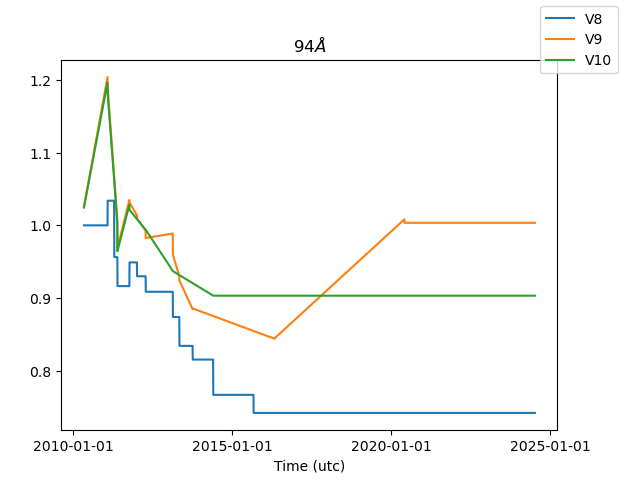

In [ ]:
with visualization.quantity_support():
    with visualization.time_support():
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(times, v8_degrad_94, label='V8')
        ax.plot(times, v9_degrad_94, label='V9')
        ax.plot(times, v10_degrad_94, label='V10')
        ax.set_title('$94 \AA$')
        fig.legend()
        plt.show()

In [ ]:
import pandas as pd

In [ ]:
v8_94 = pd.DataFrame({'time':times.value, 'degrad':v8_degrad_94.value})
v8_94.iloc[12]

time      2010-05-13T12:00:00.000
degrad                        1.0
Name: 12, dtype: object

In [ ]:
v9_94 = pd.DataFrame({'time':times.value, 'degrad':v9_degrad_94.value})
v9_94.iloc[12]

time      2010-05-13T12:00:00.000
degrad                    1.03333
Name: 12, dtype: object

In [ ]:
v10_94 = pd.DataFrame({'time':times.value, 'degrad':v10_degrad_94.value})
v10_94.iloc[12]

time      2010-05-13T12:00:00.000
degrad                   1.032118
Name: 12, dtype: object